In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns


In [2]:
df=pd.read_csv('DS2_C5_S5_OldCars_Data_Challenge.csv')

In [3]:
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [4]:
# All columns
columns = df.columns
columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [5]:
df.shape

(7253, 14)

In [6]:
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [8]:
df.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

#### New DataFrame with Required Columns for ModelPrepration

In [9]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [10]:
df.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [11]:
df['Mileage']=df['Mileage'].replace(to_replace='[A-Za-z/]', value='', regex=True).astype(float)

In [12]:
df['Engine']=df['Engine'].replace(to_replace='[A-Za-z/]', value='', regex=True).astype(float)

In [13]:
df['Power']=df['Power'].replace(to_replace='null bhp', value=np.nan)

In [14]:
df['Power']=df['Power'].replace(to_replace='[A-Za-z/]', value='', regex=True).astype(float)

In [15]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


# Null Value Treatment

In [16]:
df['Power']=df['Power'].replace(to_replace='[A-Za-z/]', value='', regex=True).astype(float)

In [17]:
df['Mileage'].mean()

18.14158047165911

In [18]:
values={'Seats':df['Seats'].mode(),'Engine':df['Engine'].mean(),'Power':df['Power'].mean(),'Price':df['Price'].mean()}

In [19]:
df.fillna(value=values,inplace=True)

In [20]:
df=df.drop(['New_Price','Name','S.No.'],axis=1)

In [21]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.750000
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.500000
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.500000
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.000000
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.740000
...,...,...,...,...,...,...,...,...,...,...,...
7248,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,9.479468
7249,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,9.479468
7250,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,9.479468
7251,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,9.479468


In [22]:
df.isnull().sum()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine                0
Power                 0
Seats                53
Price                 0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [25]:
# Using Label Encoder technique to convert categorical column into numerical type
# Label encoder knows how to understand word labels 
label_encoder = preprocessing.LabelEncoder()
df['Location'] = label_encoder.fit_transform(df['Location'])
df['Year'] = label_encoder.fit_transform(df['Year'])
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
df['Owner_Type'] = label_encoder.fit_transform(df['Owner_Type'])
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,9,13,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,10,18,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,2,14,46000,3,1,0,18.20,1199.0,88.70,5.0,4.50
3,2,15,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,3,16,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74


In [26]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#scaler=MinMaxScaler()
#df_scale = pd.DataFrame(scaler.fit_transform(df.to_numpy()), columns = df.columns)

# Correlation Matrix

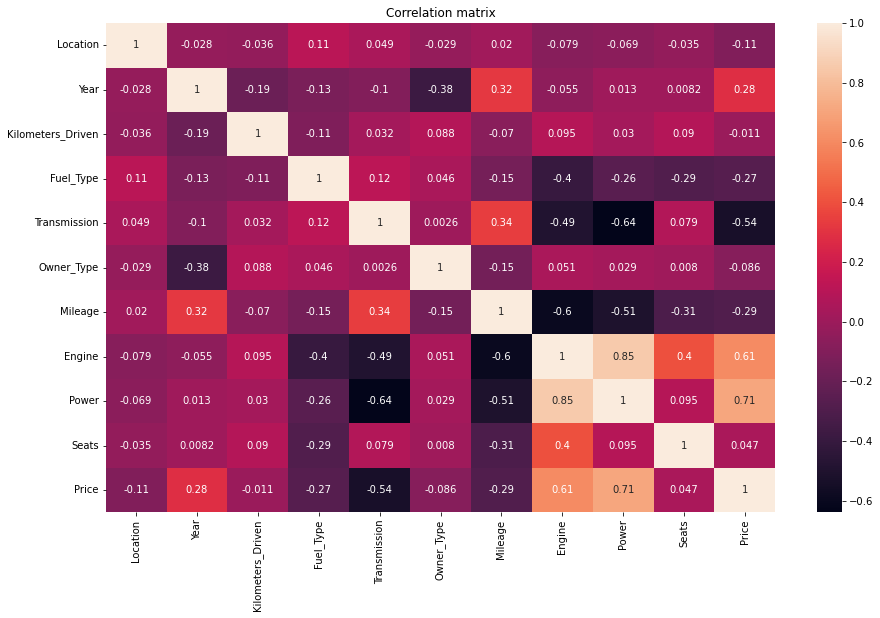

In [27]:
plt.figure(figsize=(15,9))
hm = sns.heatmap(df.corr(), annot = True)

hm.set(title = 'Correlation matrix')
plt.show()

In [28]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Location,1.000000,-0.028496,-0.035704,0.112292,0.049378,-0.028855,0.019811,-0.079429,-0.068983,-0.034663,-0.106503
Year,-0.028496,1.000000,-0.187152,-0.127523,-0.099760,-0.381912,0.318896,-0.054808,0.013101,0.008207,0.279697
Kilometers_Driven,-0.035704,-0.187152,1.000000,-0.109329,0.031759,0.087816,-0.069546,0.094552,0.030044,0.090209,-0.011092
Fuel_Type,0.112292,-0.127523,-0.109329,1.000000,0.118757,0.046407,-0.151703,-0.401733,-0.259090,-0.292808,-0.273579
Transmission,0.049378,-0.099760,0.031759,0.118757,1.000000,0.002596,0.337116,-0.494734,-0.639007,0.079205,-0.535857
Owner_Type,-0.028855,-0.381912,0.087816,0.046407,0.002596,1.000000,-0.154465,0.051128,0.028650,0.008002,-0.086165
Mileage,0.019811,0.318896,-0.069546,-0.151703,0.337116,-0.154465,1.000000,-0.595428,-0.510700,-0.310632,-0.287095
Engine,-0.079429,-0.054808,0.094552,-0.401733,-0.494734,0.051128,-0.595428,1.000000,0.853607,0.399348,0.606581
Power,-0.068983,0.013101,0.030044,-0.259090,-0.639007,0.028650,-0.510700,0.853607,1.000000,0.094745,0.705861
Seats,-0.034663,0.008207,0.090209,-0.292808,0.079205,0.008002,-0.310632,0.399348,0.094745,1.000000,0.047448


# Data Visualization

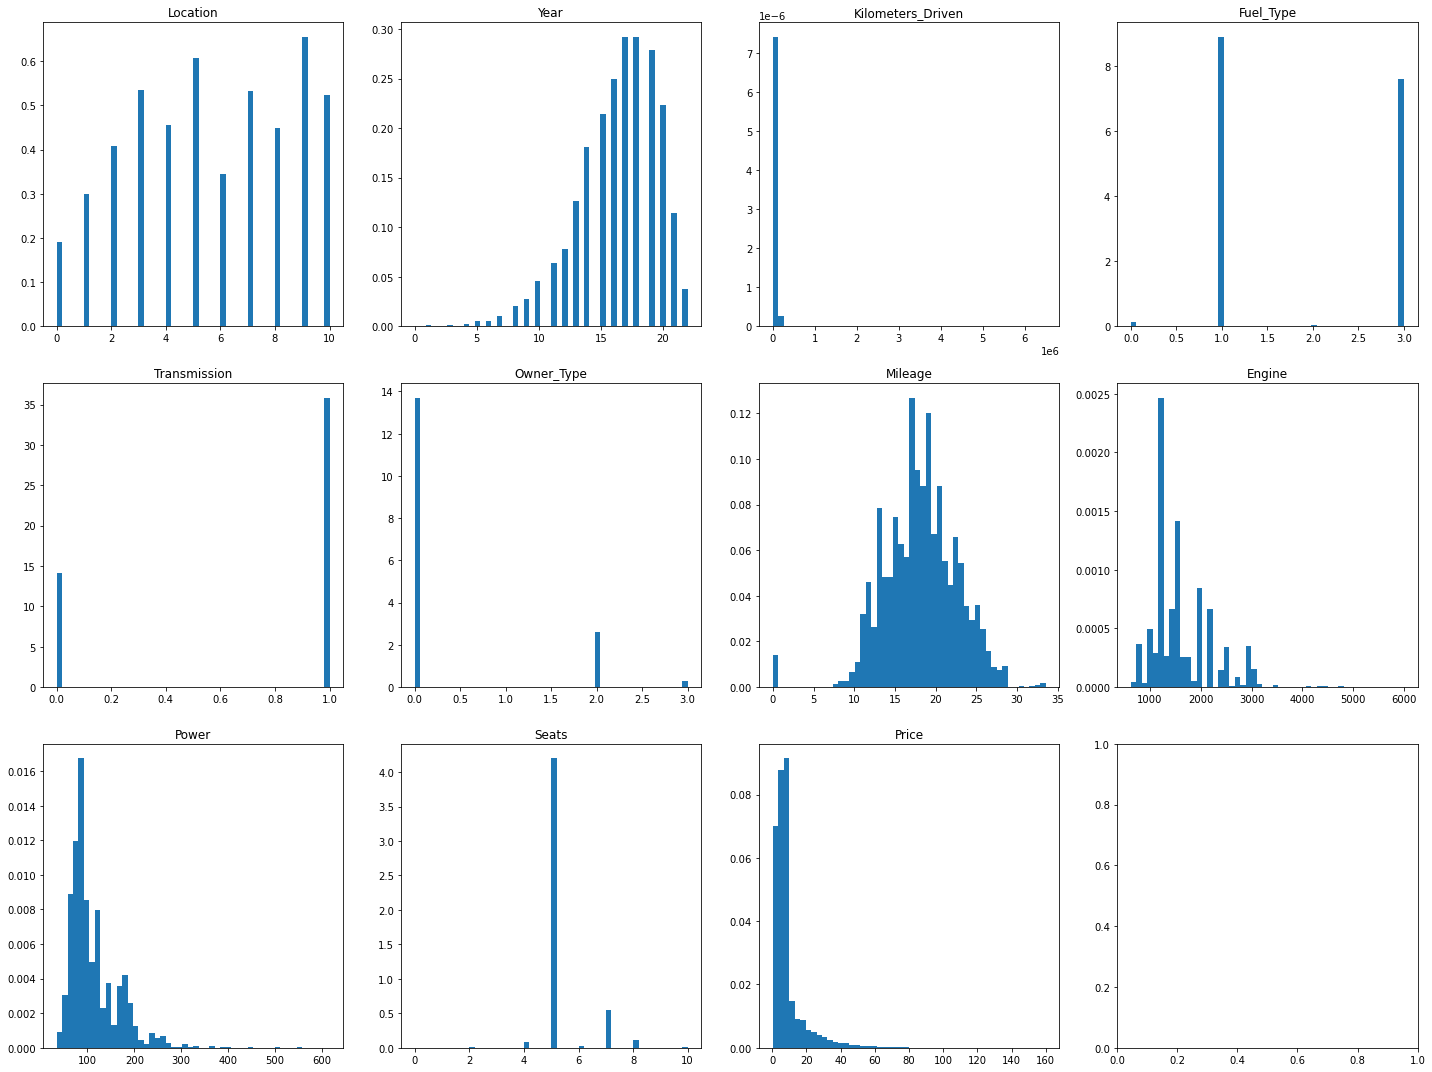

In [29]:
# Histogram of all numerical features
numerics= ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = df.select_dtypes(include = numerics)
numeric_Col = new_df.columns
num_cols= 4
n_bins = 50

num_rows = int(len(numeric_Col )/num_cols)+1

fig, axs = plt.subplots(num_rows, num_cols, tight_layout = True, figsize= (20,15))

for col, ax in zip(numeric_Col, axs.flatten()[:len(numeric_Col)]):
    ax.hist(new_df[col], bins = n_bins, density= True)
    ax.set_title(col)
plt.show()    

# Model Building

# Using Hold Out Method 

In [40]:
X=df.drop('Price',axis=1)
y=df.Price
X_train,X_test,y_train, y_test= train_test_split(X,y,train_size=0.3)

In [41]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=3)

model.fit(X_train,y_train)
print("R-Squared on test dataset={}".format(model.score(X_test,y_test)))
print("R-Squaredon train dataset={}".format(model.score(X_train, y_train)))

R-Squared on test dataset=0.6142070145217053
R-Squaredon train dataset=0.654689894400413


In [42]:
y_pred=model.predict(X_test)

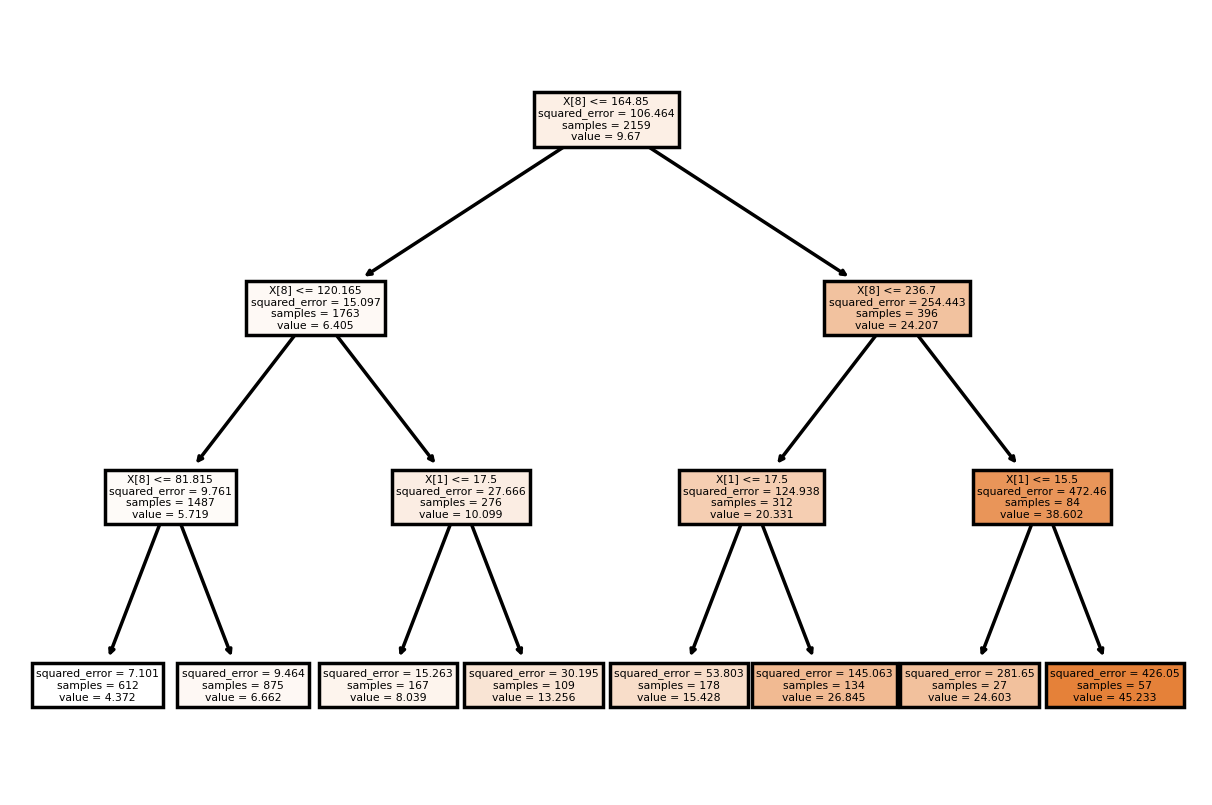

In [43]:
from sklearn import tree
#Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(dpi=250)

tree.plot_tree(model,filled = True);

#save figure in current directory as png
#fig.savefig('Bike_regression_decisiontree.png')

# Using KFold Method

In [34]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [39]:
# We will try with max depth starting from 1 to 15 and depending on the final ‘rmse’ score choose the value of max_depth.
from sklearn.model_selection import KFold, cross_val_score
from sklearn import  tree

max_depth = list(range(1,15))

kf=KFold(n_splits=5,shuffle=True)

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val), X, y,cv=kf, scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    rmse(score.mean())

For max depth: 1
rmse= 8.05
For max depth: 2
rmse= 7.27
For max depth: 3
rmse= 6.61
For max depth: 4
rmse= 6.48
For max depth: 5
rmse= 6.36
For max depth: 6
rmse= 6.49
For max depth: 7
rmse= 6.56
For max depth: 8
rmse= 6.82
For max depth: 9
rmse= 6.82
For max depth: 10
rmse= 7.05
For max depth: 11
rmse= 7.10
For max depth: 12
rmse= 7.24
For max depth: 13
rmse= 7.31
For max depth: 14
rmse= 7.34


In [36]:
#As we can see for Max Depth 5 We are getting least error so

In [37]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)

model.fit(X_train,y_train)
print("R-Squared on test dataset={}".format(model.score(X_test,y_test)))
print("R-Squaredon train dataset={}".format(model.score(X_train, y_train)))

R-Squared on test dataset=0.6251131959727858
R-Squaredon train dataset=0.7563189179333352


# The conclusion is  we can use DecisionTreeRegressor with
# Max Depth = 5 